# 4. Data Structures
by Marcel Siegmann, 2020

* [Lists and Arrays](#array)
* [Linked List](#linked_list)
* [Stacks](#stacks)
* [Queues](#queues)
* [Hash Tables](#hash_tables)
* [Trees](#trees)
* [References](#references)

## Lists and Arrays
<div id="array"/>

#### Introduction
Arrays are the most common implementation of lists. It is a core feature in many programming languages.
An array is a container of items in some order. Depending on the programming language Arrays have a fixed size of items and mostly contain only one data type, but this is not the general case. 

The main point of an array is that is has an index for every item in the array. Due to that items can be accessed with O(1).

#### Functionality
In python the implementation of arrays is not 100 % clear. Python does not have built-in support for Arrays, but Python Lists can be used instead.

* List: [1,2,3]
* Tuple: (1,2,3)
* String: '123'

In [1]:
_list = [1,2,3]
_tuple = (1,2,3)
_string = "123"

print(_list[1])
print(_tuple[1])
print(_string[1])

2
2
2


#### Time Complexities worst case
    * Access: O(1)
    * Search: O(n)
    * Insertion O(n)
    * Deletion O(n)

#### Strength and limitations
* Strength:
    * Space efficient
    * Fast access by index
* Limitations
    * Adding and removing elements is slow


#### Real World Example
Lists and arrays are the basis of every language. Thus they are used quite frequently. If you have a problem where you want to get an item from the middle, an array is a good choiche, because you can reach it easily by index with O(1)

## Linked Lists
<div id="linked_list"/>

#### Introduction
A linked list is an extension of a list, but it has nothing in common with an array. A linked list is characterized by its links. Each element has some notion which element the next element is, but no information about the length of the list or where each element is.

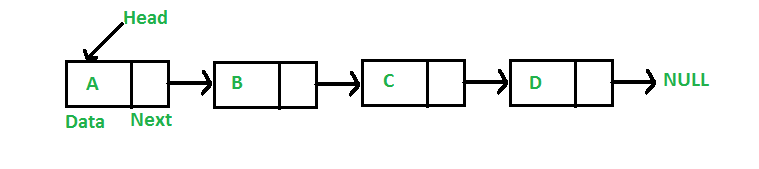
#### Functionality
In python a linked list is not a core feature. It can be easily represented by objects:

In [2]:
class Element(object):
    def __init__(self, value):
        self.value = value
        self.next = None


class LinkedList(object):
    def __init__(self, head=None):
        self.head = head

    def append(self, new_element):
        current = self.head
        if self.head:
            while current.next:
                current = current.next
            current.next = new_element
        else:
            self.head = new_element

    def get_position(self, position):
        """Get an element from a particular position.
        Assume the first position is "1".
        Return "None" if position is not in the list."""
        current = self.head
        for i in range(1, position+1):
            if i == position:
                return current
            if current.next:
                current = current.next
        return None

    def insert(self, new_element, position):
        """Insert a new node at the given position.
        Assume the first position is "1".
        Inserting at position 3 means between
        the 2nd and 3rd elements."""
        current = self.head
        for i in range(1, position + 1):
            if i == position-1:
                new_element.next = current.next
                current.next = new_element
            if current.next:
                current = current.next
        return None

    def delete(self, value):
        """Delete the first node with a given value."""
        current = self.head
        while current.next:
            if current.value == value:
                self.head = current.next
                return True

        return None


# Test cases
# Set up some Elements
e1 = Element(1)
e2 = Element(2)
e3 = Element(3)
e4 = Element(4)

# Start setting up a LinkedList
ll = LinkedList(e1)
ll.append(e2)
ll.append(e3)

# Test get_position
# Should print 3
print(ll.head.next.next.value)
# Should also print 3
print(ll.get_position(3).value)

# Test insert
ll.insert(e4, 3)
# Should print 4 now
print(ll.get_position(3).value)

# Test delete
ll.delete(1)
# Should print 2 now
print(ll.get_position(1).value)
# Should print 4 now
print(ll.get_position(2).value)
# Should print 3 now
print(ll.get_position(3).value)

3
3
4
2
4
3


#### Time Complexities average / worst case
    * Access:      O(n) / O(n)
    * Search:      O(n) / O(n)
    * Insertion:   O(1) / O(1)
    * Deletion:    O(1) / O(1)

#### Strength and limitations
* Strength:
    * Fast insertion
    * fast deletion
* Limitations
    * Searching is slow, because you just have the reference to the next element or in double linked-list to the previous and next element


#### Real World Example
* Implementation of stacks and queues
* Dynamic memory allocation : We use linked list of free blocks
* Maintaining directory of names

## Stacks
<div id="stacks"/>

#### Introduction
Stacks are also list-based data structures. You can compare a stack to a stack of objects in real life. You keep putting elements on top and you have easy access to remove or look at the top element. They can be really useful when you only care about the most recent elements or the order in which you see and save elements actually matters.
Stack is a linear data structure which follows a particular order in which the operations are performed. The order may be LIFO(Last In First Out) or FILO(First In Last Out)

#### Functionality

In [3]:
class LinkedList(object):
    def __init__(self, head=None):
        self.head = head

    def append(self, new_element):
        current = self.head
        if self.head:
            while current.next:
                current = current.next
            current.next = new_element
        else:
            self.head = new_element

    def insert_first(self, new_element):
        "Insert new element as the head of the LinkedList"
        new_element.next = self.head
        self.head = new_element

    def delete_first(self):
        element_to_remove = None
        if self.head is not None:
            element_to_remove = self.head
            self.head = self.head.next
        return element_to_remove
    
class Stack(object):
    def __init__(self, top=None):
        self.ll = LinkedList(top)

    def push(self, new_element):
        "Push (add) a new element onto the top of the stack"
        self.ll.insert_first(new_element)

    def pop(self):
        "Pop (remove) the first element off the top of the stack and return it"
        return self.ll.delete_first()

# Test cases
# Set up some Elements
e1 = Element(1)
e2 = Element(2)
e3 = Element(3)
e4 = Element(4)

# Start setting up a Stack
stack = Stack(e1)

# Test stack functionality
stack.push(e2)
stack.push(e3)
print(stack.pop().value)
print(stack.pop().value)
print(stack.pop().value)
print(stack.pop())
stack.push(e4)
print(stack.pop().value)

3
2
1
None
4


#### Time Complexities average / worst case
    * Access:      O(n) / O(n)
    * Search:      O(n) / O(n)
    * Insertion:   O(1) / O(1)
    * Deletion:    O(1) / O(1)

#### Strength and limitations
* Useful when you need the most recent element

#### Real World Example
* Newsfeed

## Queues
<div id="queues"/>

#### Introduction
A queue is kind of the opposite of a stack. It is based on the principle First In, First Out. References to head and tail are saved, that they can be looked up in constant time.

#### Functionality

In [4]:
class Queue:
    def __init__(self, head=None):
        self.storage = [head]

    def enqueue(self, new_element):
        self.storage.append(new_element)

    def peek(self):
        return self.storage[0]

    def dequeue(self):
        return self.storage.pop(0)


# Setup
q = Queue(1)
q.enqueue(2)
q.enqueue(3)

# Test peek
# Should be 1
print(q.peek())

# Test dequeue
# Should be 1
print(q.dequeue())

# Test enqueue
q.enqueue(4)
# Should be 2
print(q.dequeue())

# Should be 3
print(q.dequeue())
# Should be 4
print(q.dequeue())
q.enqueue(5)
# Should be 5
print(q.peek())

1
1
2
3
4
5


In [5]:
# Alternative
from collections import deque

d = deque([1, 2, 3, 4, 5])
d.append(6)

In [6]:
d.popleft()

1

In [7]:
d.pop()

6

#### Time Complexities average / worst case
    * Access:      O(n) / O(n)
    * Search:      O(n) / O(n)
    * Insertion:   O(1) / O(1)
    * Deletion:    O(1) / O(1)

#### Strength and limitations
* Useful for all sorts propblems where the order matters and you are interested in the first or last element

#### Real World Example
* Process orders in a webshop. 
* Email Notification when signing up


## Hash Tables
<div id="queues"/>

#### Introduction
A __Hash Table__ is a data structure that stores data by an association between keys and values. In Python the implementation of a hash table is the dictionary. Hash tables are implementations of associative arrays. Due to how the values are mapped to keys, it is very easy and quick to retrieve data from a dictionary.

#### Functionality

In [8]:
# Core functionality Dict
d = {"test": 2, "neu": 3,"hello": 4}
d["test"]

# Own implementation
class HashTable(object):
    def __init__(self):
        self.table = [None] * 10000

    def store(self, string):
        hv = self.calculate_hash_value(string)
        if hv != -1:
            if self.table[hv] is not None:
                self.table[hv].append(string)
            else:
                self.table[hv] = [string]

    def lookup(self, string):
        hv = self.calculate_hash_value(string)
        if hv != -1:
            if self.table[hv] != None:
                if string in self.table[hv]:
                    return hv
        return -1

    def calculate_hash_value(self, string):
        return ord(string[0])*100 + ord(string[1])


# Setup
hash_table = HashTable()

# Test calculate_hash_value
# Should be 8568
print(hash_table.calculate_hash_value('UDACITY'))

# Test lookup edge case
# Should be -1
print(hash_table.lookup('UDACITY'))

# Test store
hash_table.store('UDACITY')
# Should be 8568
print(hash_table.lookup('UDACITY'))

# Test store edge case
hash_table.store('UDACIOUS')
# Should be 8568
print(hash_table.lookup('UDACIOUS'))

8568
-1
8568
8568


#### Time Complexities average / worst case
    * Access:      n/a / n/a
    * Search:      O(1) / O(n)
    * Insertion:   O(1) / O(n)
    * Deletion:    O(1) / O(n)

#### Strength and limitations
* strength
    * Main advantage is synchronization
    * Hash tables are a convenient way to implement the mechanism that connects a variable's name to its memory location.
* limitations
    * Hash collisions are practically unavoidable. when hashing a random subset of a large set of possible keys
    * Hash tables become quite inefficient when there are many collisions

#### Real World Example
* Hashing is useful for indexing large storage spaces, so that you can look things up in them without reading their entire contents every time.
* Check if an ticket is valid by its ticket number 

## Trees
<div id="trees"/>

#### Introduction
A tree is an extension of a linked list. The first element, called the root, can have several next elements. Just like a linked list, each element on a tree contains some data. The individual elements in a tree are often called nodes. The nodes in a tree always needs to be connected. Unlike Array and Linked List, which are linear data structures, tree is hierarchical (or non-linear) data structure

#### Functionality 
The following code shows an implementation of a Binary Tree:

In [9]:
class Node(object):
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None


class BinaryTree(object):
    def __init__(self, root):
        self.root = Node(root)

    def search(self, find_val):
        """Return True if the value
        is in the tree, return
        False otherwise."""
        return self.preorder_search(self.root, find_val)

    def print_tree(self):
        """Print out all tree nodes
        as they are visited in
        a pre-order traversal."""
        traversal = f"{self.root.value}"
        return self.preorder_print(self.root, traversal)

    def preorder_search(self, start, find_val):
        if start.left is None:
            return False
        elif start.left.value == find_val:
            return True

        if start.left is None:
            return False
        elif start.right.value == find_val:
            return True

        if self.preorder_search(start.left, find_val):
            return True
        if self.preorder_search(start.right, find_val):
            return True

        return False

    def preorder_print(self, start, traversal):
        """Helper method - use this to create a
        recursive print solution."""
        if start.left is None:
            pass
        elif start.left.value:
            traversal += f"-{start.left.value}"
            traversal = self.preorder_print(start.left, traversal)

        if start.right is None:
            return traversal
        elif start.right.value:
            traversal += f"-{start.right.value}"
            traversal = self.preorder_print(start.right, traversal)

        return traversal



# Set up tree
tree = BinaryTree(1)
tree.root.left = Node(2)
tree.root.right = Node(3)
tree.root.left.left = Node(4)
tree.root.left.right = Node(5)

# Test search
# Should be True
print(tree.search(4))
# Should be False
print(tree.search(6))

# Test print_tree
# Should be 1-2-4-5-3
print(tree.print_tree())

True
False
1-2-4-5-3


#### Time Complexities worst case tree structure in general
    * Access:      O(n)
    * Search:      O(n)
    * Insertion:   O(n)
    * Deletion:    O(n)

#### Time Complexities average / worst case binary search tree
    * Access:      O(log n) / O(n)
    * Search:      O(log n) / O(n)
    * Insertion:   O(log n) / O(n)
    * Deletion:    O(log n) / O(n)

#### Strength and limitations
* strength
    * store information that naturally forms a hierarchy
    * Depending on the implementation of your tree structure e.g binary tree search allows fast search, insert, delete on sorted data
  
* limitations
    * The main disadvantage is that we should always implement a balanced binary search tree - AVL tree, Red-Black tree, Splay tree. Otherwise the cost of operations may not be logarithmic and degenerate into a linear search on an array

#### Real World Example
* Store hierarchical data, like folder structure
* Database indexing is using a B-tree

__References__
<div id="references"></div>

* [Udacity Course](https://classroom.udacity.com/courses/ud513/lessons)

* https://www.geeksforgeeks.org/data-structures/

* https://www.tutorialspoint.com/data_structures_algorithms/index.htm